## Linear regression workbook

This workbook will walk you through a linear regression example. It will provide familiarity with Jupyter Notebook and Python.  Please print (to pdf) a completed version of this workbook for submission with HW #1.

ECE C147/C247, Winter Quarter 2024, Prof. J.C. Kao, TAs: T.Monsoor, Y. Liu, S. Rajesh, L. Julakanti, K. Pang

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#allows matlab plots to be generated in line
%matplotlib inline 

### Data generation

For any example, we first have to generate some appropriate data to use. The following cell generates data according to the model: $y = x - 2x^2 + x^3 + \epsilon$

Text(0, 0.5, '$y$')

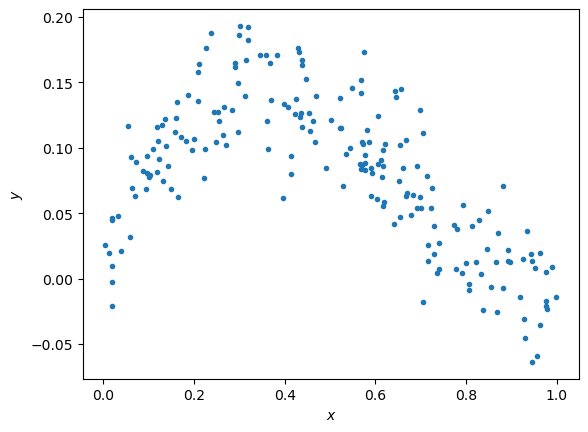

In [2]:
np.random.seed(0)  # Sets the random seed.
num_train = 200     # Number of training data points

# Generate the training data
x = np.random.uniform(low=0, high=1, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

### QUESTIONS:

Write your answers in the markdown cell below this one:

(1) What is the generating distribution of $x$?

(2) What is the distribution of the additive noise $\epsilon$?

### ANSWERS:

(1) x is generated by function np.random.uniform (uniform distribution) on interval [0,1]. 

(2) $\epsilon$ is geerated by np.random.normal (normal distribution ) on interval [0,0.03].

### Fitting data to the model (5 points)

Here, we'll do linear regression to fit the parameters of a model $y = ax + b$.

In [3]:
# xhat = (x, 1)
xhat = np.vstack((x, np.ones_like(x)))

# GOAL: create a variable theta; theta is a numpy array whose elements are [a, b]


#y=ax+b

#theta = (X^TX)^-1 X^T y

#from lecture note


theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))


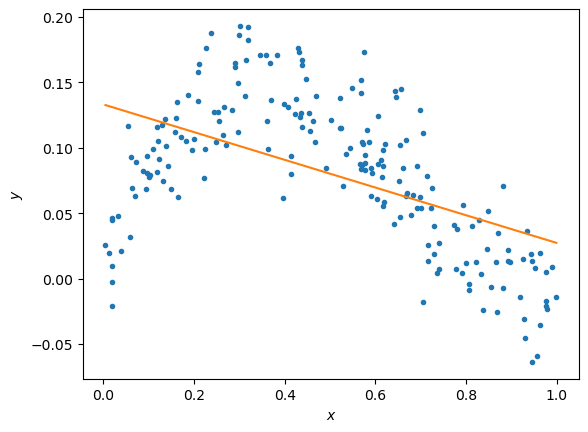

In [4]:
# Plot the data and your model fit.
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression line
xs = np.linspace(min(x), max(x),50)
xs = np.vstack((xs, np.ones_like(xs)))
plt.plot(xs[0,:], theta.dot(xs))

### QUESTIONS

(1) Does the linear model under- or overfit the data?

(2) How to change the model to improve the fitting?

### ANSWERS

(1) By looking at the graph, I would say the linear model underfits the data

(2) Add more features and try plolynomial model to fit the data.

### Fitting data to the model (5 points)

Here, we'll now do regression to polynomial models of orders 1 to 5.  Note, the order 1 model is the linear model you prior fit.

In [5]:
N = 5
xhats = []
thetas = []

xhat_0 = np.vstack((x, np.ones_like(x)))
theta_0 = np.linalg.inv(xhat_0.dot(xhat_0.T)).dot(xhat_0.dot(y))

xhats.append(xhat_0)
thetas.append(theta_0)


# GOAL: create a variable thetas.
# thetas is a list, where theta[i] are the model parameters for the polynomial fit of order i+1.
#   i.e., thetas[0] is equivalent to theta above.
#   i.e., thetas[1] should be a length 3 np.array with the coefficients of the x^2, x, and 1 respectively.
#   ... etc.

for i in range(1, N):
    
    #Need j for x^n +x^(n-1)+...
    
    xhat = np.vstack([x**(j+1) for j in reversed(range(i+1))] + [np.ones_like(x)])
    xhats.append(xhat)

    theta = np.linalg.inv(xhat.dot(xhat.T)).dot(xhat.dot(y))
    thetas.append(theta)

        
        
display(thetas)


[array([-0.10599633,  0.13315817]),
 array([-0.48023061,  0.36743967,  0.05521084]),
 array([ 0.8843808 , -1.82077417,  0.91178032,  0.00979068]),
 array([ 0.14080037,  0.60466289, -1.64250929,  0.87250485,  0.01175321]),
 array([ 0.52432591, -1.164568  ,  1.76052438, -2.07430275,  0.93373916,
         0.009716  ])]

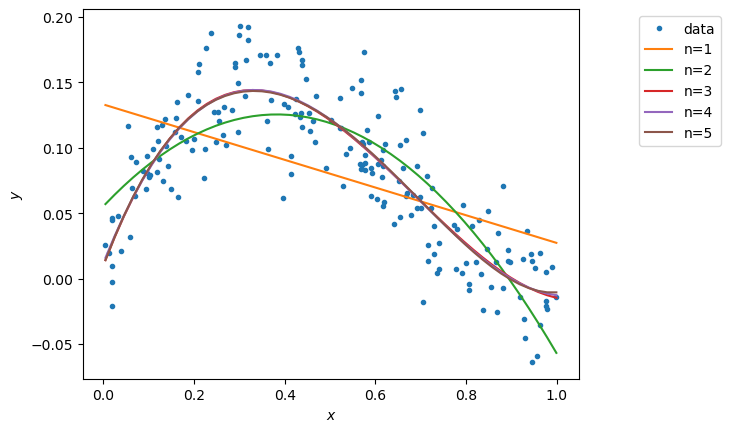

In [6]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

### Calculating the training error (5 points)

Here, we'll now calculate the training error of polynomial models of orders 1 to 5.

In [6]:
training_errors = []



# GOAL: create a variable training_errors, a list of 5 elements,
# where training_errors[i] are the training loss for the polynomial fit of order i+1.


for i in range(N):
    y_pred = np.dot(xhats[i].T, thetas[i])
    error = 0.5 * np.sum((y_pred - y) ** 2) # I used formula \frac{1}{2}\sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2
    training_errors.append(error)
    

print ('Training errors are: \n', training_errors)

min_error = min(training_errors) 
min_error_index = np.argmin(training_errors) + 1 # list index starts from 0 

print('\n')
print ('The best training error  is \n' + 'polynomial: '  + str(min_error_index) +  '\n' +'error: ', min_error)

Training errors are: 
 [0.2379961088362701, 0.1092492220926853, 0.08169603801105368, 0.08165353735296979, 0.08161479195525292]


The best training error  is 
polynomial: 5
error:  0.08161479195525292


### QUESTIONS

(1) What polynomial has the best training error?

(2) Why is this expected?

### ANSWERS

(1) The highest degree (polynomial=5) has the best training error.

(2) A higher degree will always fit the data no worse than a lower degree one. We can always gain more information from a new feature, but it would cause overfitting in many cases.

### Generating new samples and testing error (5 points)

Here, we'll now generate new samples and calculate testing error of polynomial models of orders 1 to 5.

Text(0, 0.5, '$y$')

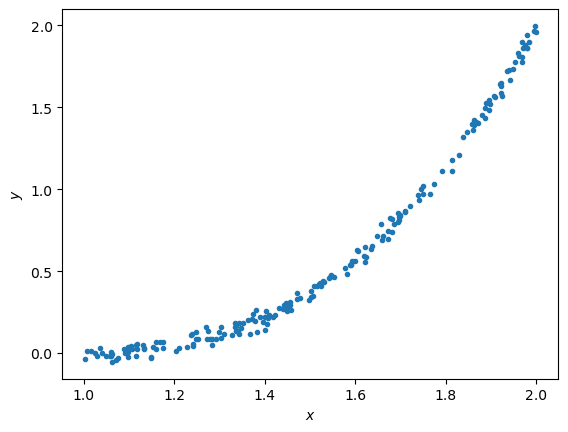

In [7]:
x = np.random.uniform(low=1, high=2, size=(num_train,))
y = x - 2*x**2 + x**3 + np.random.normal(loc=0, scale=0.03, size=(num_train,))
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [8]:
xhats = []
for i in np.arange(N):
    if i == 0:
        xhat = np.vstack((x, np.ones_like(x)))
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        xhat = np.vstack((x**(i+1), xhat))
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))
                              
    xhats.append(xhat)

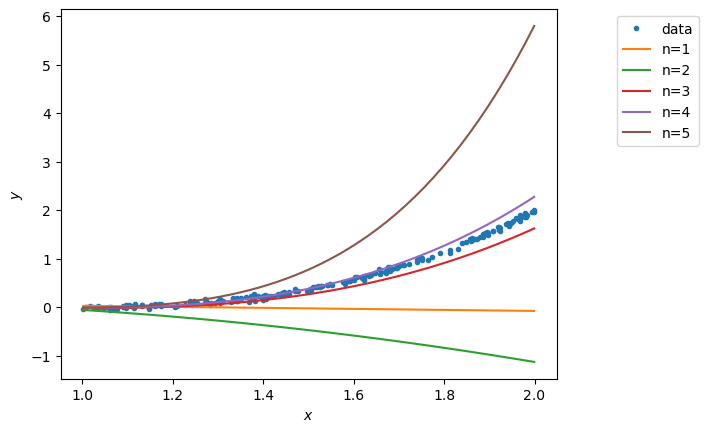

In [9]:
# Plot the data
f = plt.figure()
ax = f.gca()
ax.plot(x, y, '.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Plot the regression lines
plot_xs = []
for i in np.arange(N):
    if i == 0:
        plot_x = np.vstack((np.linspace(min(x), max(x),50), np.ones(50)))
    else:
        plot_x = np.vstack((plot_x[-2]**(i+1), plot_x))                              
    plot_xs.append(plot_x)

for i in np.arange(N):
    ax.plot(plot_xs[i][-2,:], thetas[i].dot(plot_xs[i]))

labels = ['data']
[labels.append('n={}'.format(i+1)) for i in np.arange(N)]
bbox_to_anchor=(1.3, 1)
lgd = ax.legend(labels, bbox_to_anchor=bbox_to_anchor)

In [10]:
testing_errors = []


for i in range(N):
    y_pred = np.dot(xhats[i].T, thetas[i])
    error = 0.5 * np.sum((y_pred - y) ** 2)   # I used formula \frac{1}{2}\sum_{i=1}^N (y^{(i)} - \hat{y}^{(i)})^2
    testing_errors.append(error)
    

print ('Testing errors are: \n', testing_errors)

min_error = min(testing_errors) 
min_error_index = np.argmin(testing_errors) + 1 # list index starts from 0 

print('\n')
print ('The best training error  is \n' + 'polynomial: '  + str(min_error_index) +  '\n' +'error: ', min_error)


Testing errors are: 
 [80.86165184550585, 213.19192445058425, 3.1256971084000043, 1.1870765206845277, 214.91021759471494]


The best training error  is 
polynomial: 4
error:  1.1870765206845277


### QUESTIONS

(1) What polynomial has the best testing error?

(2) Why polynomial models of orders 5 does not generalize well?

### ANSWERS

(1) Polynomial=4 has the best testing error.

(2) As mentioned in the previous queston, higher polynomial degree will have a higher chance of overfitting the data. The testing data shown here cannot be generalized with a $x^5$ term. Therefore, in this case, it does not fit well